In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleNetwork(nn.Module):
    def __init__(self):
        super(SimpleNetwork, self).__init__()
        # Define layers with specified sizes
        self.fc1 = nn.Linear(784, 64)  # Input layer: 784 -> 64
        self.fc2 = nn.Linear(64, 32)   # Hidden layer 1: 64 -> 32
        self.fc3 = nn.Linear(32, 16)   # Hidden layer 2: 32 -> 16
        self.fc4 = nn.Linear(16, 4)    # Hidden layer 3: 16 -> 4
        self.fc5 = nn.Linear(4, 1)     # Output layer: 4 -> 1

    def forward(self, x):
        # Define forward pass with ReLU activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)  # No activation on output layer for regression
        return x

# Training function
def train_network(model, train_data, train_labels, epochs=100, learning_rate=0.01):
    # Define loss function (Mean Squared Error for regression)
    criterion = nn.MSELoss()

    # Define optimizer (Stochastic Gradient Descent)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        outputs = model(train_data)
        loss = criterion(outputs, train_labels)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update weights

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    return model

# Example usage:
if __name__ == "__main__":
    # Create sample data matching the input size
    batch_size = 32
    train_data = torch.randn(batch_size, 784)    # Input size: 784
    train_labels = torch.randn(batch_size, 1)    # Output size: 1

    # Initialize model
    model = SimpleNetwork()

    # Train the model
    trained_model = train_network(model, train_data, train_labels, epochs=100, learning_rate=0.01)

Epoch [10/100], Loss: 1.1986
Epoch [20/100], Loss: 1.1175
Epoch [30/100], Loss: 1.0664
Epoch [40/100], Loss: 1.0323
Epoch [50/100], Loss: 1.0095
Epoch [60/100], Loss: 0.9936
Epoch [70/100], Loss: 0.9817
Epoch [80/100], Loss: 0.9724
Epoch [90/100], Loss: 0.9647
Epoch [100/100], Loss: 0.9577


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class DeepFCNN(nn.Module):
    def __init__(self, input_size=784, hidden_size=64, output_size=1, num_hidden_layers=1000):
        """Initialize a fully connected neural network with 1000 hidden layers"""
        super(DeepFCNN, self).__init__()

        # Dynamically create layers using nn.Sequential
        layers = []

        # First layer: input_size -> hidden_size
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())

        # Add 999 more hidden layers (total 1000 hidden layers)
        for _ in range(num_hidden_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())

        # Output layer: hidden_size -> output_size
        layers.append(nn.Linear(hidden_size, output_size))
        # No activation on output (for regression/binary classification)

        # Combine into Sequential
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        """Forward pass through the network"""
        return self.network(x)

# Training function
def train_network(model, train_data, train_labels, epochs=100, learning_rate=0.01, verbose=False):
    """Train the network with SGD and MSE loss"""
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        # Forward pass
        outputs = model(train_data)
        loss = criterion(outputs, train_labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress if verbose
        if verbose and (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    return model

# Example usage
if __name__ == "__main__":
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create sample data
    batch_size = 32
    input_size = 784  # e.g., flattened MNIST image
    train_data = torch.randn(batch_size, input_size)  # Random input
    train_labels = torch.randn(batch_size, 1)        # Random target (regression)

    # Initialize model
    model = DeepFCNN(input_size=input_size, hidden_size=64, output_size=1, num_hidden_layers=1000)

    # Print model summary (number of parameters)
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total number of parameters: {total_params:,}")

    # Train the model
    print("\nTraining the deep FCNN:")
    trained_model = train_network(model, train_data, train_labels, epochs=100, learning_rate=0.01, verbose=True)

    # Test with a sample prediction
    with torch.no_grad():
        sample_input = train_data[:5]  # Take first 5 samples
        predictions = trained_model(sample_input)
        print("\nSample predictions for first 5 inputs:")
        for i in range(5):
            print(f"Input {i+1}: Predicted: {predictions[i].item():.4f}, True: {train_labels[i].item():.4f}")

Total number of parameters: 4,206,145

Training the deep FCNN:
Epoch [10/100], Loss: 1.0146
Epoch [20/100], Loss: 1.0120
Epoch [30/100], Loss: 1.0106
Epoch [40/100], Loss: 1.0099
Epoch [50/100], Loss: 1.0095
Epoch [60/100], Loss: 1.0093
Epoch [70/100], Loss: 1.0092
Epoch [80/100], Loss: 1.0091
Epoch [90/100], Loss: 1.0091
Epoch [100/100], Loss: 1.0091

Sample predictions for first 5 inputs:
Input 1: Predicted: -0.0724, True: -1.3562
Input 2: Predicted: -0.0724, True: 0.7948
Input 3: Predicted: -0.0724, True: -1.7807
Input 4: Predicted: -0.0724, True: 0.3530
Input 5: Predicted: -0.0724, True: -0.2267


Epoch [1/10], Loss: 0.6736, Accuracy: 0.5323
Epoch [2/10], Loss: 0.4154, Accuracy: 0.8516
Epoch [3/10], Loss: 0.0446, Accuracy: 0.9963
Epoch [4/10], Loss: 0.0137, Accuracy: 0.9971
Epoch [5/10], Loss: 0.0090, Accuracy: 0.9979
Epoch [6/10], Loss: 0.0070, Accuracy: 0.9985
Epoch [7/10], Loss: 0.0058, Accuracy: 0.9984
Epoch [8/10], Loss: 0.0050, Accuracy: 0.9986
Epoch [9/10], Loss: 0.0045, Accuracy: 0.9986
Epoch [10/10], Loss: 0.0041, Accuracy: 0.9987

Test Accuracy: 0.9991


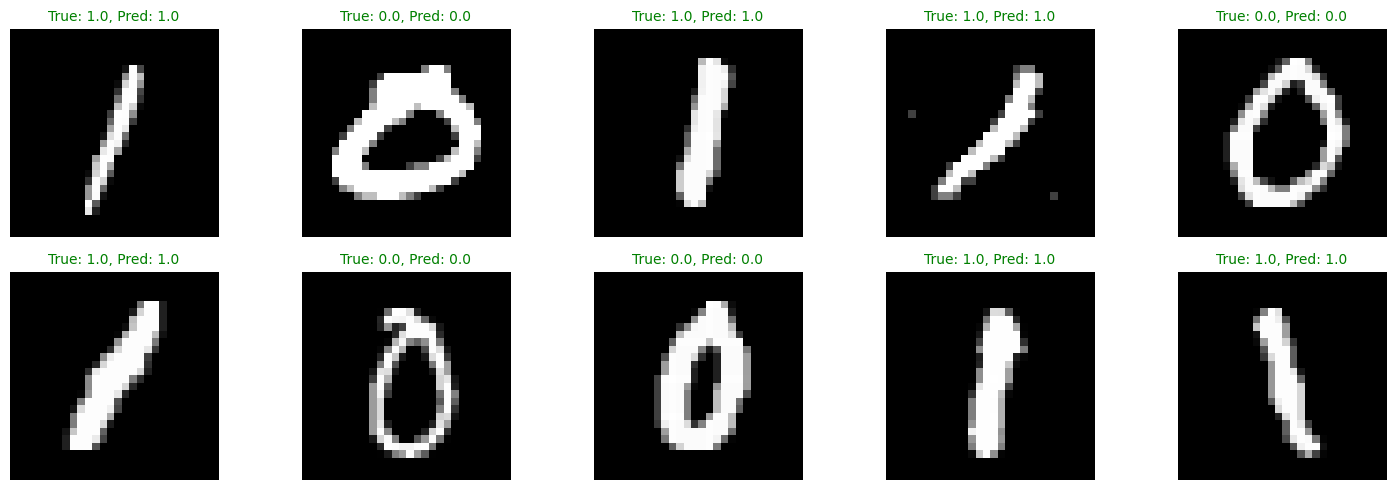

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

class SimpleNetwork(nn.Module):
    def __init__(self):
        super(SimpleNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 64)  # 28x28 = 784 input
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 4)
        self.fc5 = nn.Linear(4, 1)     # Single output for binary classification

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the 28x28 images
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)  # Linear output (logits) for BCEWithLogitsLoss
        return x

def train_network(model, train_loader, epochs=10, learning_rate=0.01, device='cpu'):
    # Use BCEWithLogitsLoss for binary classification (includes sigmoid)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device).float()

            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target.view(-1, 1))

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Calculate accuracy
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct += (predicted == target.view(-1, 1)).sum().item()
            total += target.size(0)

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

    return model

def evaluate_model(model, data_loader, device):
    model.eval()
    correct = 0
    total = 0
    all_predictions = []
    all_targets = []
    all_images = []

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device).float()

            outputs = model(data)
            predicted = (torch.sigmoid(outputs) > 0.5).float()

            correct += (predicted == target.view(-1, 1)).sum().item()
            total += target.size(0)

            all_predictions.extend(predicted.cpu().numpy().flatten())
            all_targets.extend(target.cpu().numpy().flatten())
            all_images.extend(data.cpu().numpy())

    accuracy = correct / total
    print(f'\nTest Accuracy: {accuracy:.4f}')

    return all_images, all_targets, all_predictions

def visualize_predictions(images, true_labels, predicted_labels, num_samples=10):
    plt.figure(figsize=(15, 5))

    # Randomly select samples
    sample_indices = np.random.choice(len(images), num_samples, replace=False)

    for i, idx in enumerate(sample_indices):
        plt.subplot(2, num_samples//2, i+1)
        # Reshape and display image
        plt.imshow(images[idx].squeeze(), cmap='gray')

        # Determine color based on prediction correctness
        color = 'green' if true_labels[idx] == predicted_labels[idx] else 'red'

        plt.title(f'True: {true_labels[idx]}, Pred: {predicted_labels[idx]}',
                  color=color, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Prepare MNIST data for 0/1 classification
def get_mnist_01_subset(train=True):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Load MNIST dataset
    dataset = datasets.MNIST('./data', train=train, download=True, transform=transform)

    # Filter for digits 0 and 1 only
    idx = (dataset.targets == 0) | (dataset.targets == 1)
    dataset.data = dataset.data[idx]
    dataset.targets = dataset.targets[idx]

    return dataset

if __name__ == "__main__":
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Get training and test data
    train_dataset = get_mnist_01_subset(train=True)
    test_dataset = get_mnist_01_subset(train=False)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Initialize model
    model = SimpleNetwork().to(device)

    # Train
    trained_model = train_network(
        model,
        train_loader,
        epochs=10,
        learning_rate=0.01,
        device=device
    )

    # Evaluate and visualize
    images, true_labels, predicted_labels = evaluate_model(
        trained_model,
        test_loader,
        device
    )

    # Visualize some predictions
    visualize_predictions(images, true_labels, predicted_labels)

    # Save the model
    torch.save(trained_model.state_dict(), 'mnist_01_model.pth')